<h1>Импорт библиотек

In [16]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [8]:
def mat_vec_mult(matrix, vector):
    n = len(matrix)  
    result = [[0] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            result[i][0] += matrix[i][j] * vector[j][0]
    
    return result

def sum_prod(X, V):
    n = len(X[0]) 
    result = [[0] for _ in range(n)]
    for matrix, vector in zip(X, V):
        product = mat_vec_mult(matrix, vector)
        for i in range(n):
            result[i][0] += product[i][0]
    
    return result

# Тесты 2x2
mat1 = [[1, 2], [3, 4]]
vec1 = [[1], [0]]

mat2 = [[2, 0], [1, 2]]
vec2 = [[0], [1]]

mat3 = [[0, 1], [1, 0]]
vec3 = [[2], [3]]

print(sum_prod([mat1, mat2, mat3], [vec1, vec2, vec3]))  # Ожидается: [[4], [7]]

# Тест с матрицами 3x3
mat4 = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
vec4 = [[1], [1], [1]]

mat5 = [[2, 2, 2], [2, 2, 2], [2, 2, 2]]
vec5 = [[1], [0], [0]]

print(sum_prod([mat4, mat5], [vec4, vec5]))  # Ожидается:[[3], [3], [3]]


[[4], [7]]
[[3], [3], [3]]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [11]:
def binarize(M, threshold=0.5):
    return [[1 if element >= threshold else 0 for element in row] for row in M]

# тесты
print(binarize([[0.3, 0.6, 0.1], [0.8, 0.2, 0.5]], threshold=0.5))
# [[0, 1, 0], [1, 0, 1]]
print(binarize([[1, 0, 0.4], [0.7, 0.3, 0.8]], threshold=0.4))
# [[1, 0, 1], [1, 0, 1]]
print(binarize([[0.9, 0.5], [0.3, 0.2]], threshold=0.6))
# [[1, 0], [0, 0]]


[[0, 1, 0], [1, 0, 1]]
[[1, 0, 1], [1, 0, 1]]
[[1, 0], [0, 0]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [22]:
def unique_rows(mat):
    return [set(row) for row in mat]
def unique_columns(mat):
    return [set(col) for col in zip(*mat)]
matrix = [
    [1, 2, 2, 3],
    [4, 5, 4, 6],
    [7, 8, 8, 7],
    [1, 2, 3, 4]
]
# тесты
print("Уникальные элементы в строках матрицы:")
print(unique_rows(matrix))  # [{1, 2, 3}, {4, 5, 6}, {7, 8}, {1, 2, 3, 4}] 
print("Уникальные элементы в столбцах матрицы:")
print(unique_columns(matrix))  # [{1, 4, 7}, {2, 5, 8}, {2, 3, 4, 8}, {3, 4, 6, 7}]


Уникальные элементы в строках матрицы:
[{1, 2, 3}, {4, 5, 6}, {8, 7}, {1, 2, 3, 4}]
Уникальные элементы в столбцах матрицы:
[{1, 4, 7}, {8, 2, 5}, {8, 2, 3, 4}, {3, 4, 6, 7}]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Сгенерированная матрица:
[[ 0.08211149 -0.49086549 -0.65858678  0.63426319]
 [ 0.74966537  0.97982538  1.11158692  0.0564909 ]
 [ 0.10247015  2.37905273 -0.77034201  0.21836809]
 [-0.03583197 -0.96408224 -0.57199358  0.43381389]
 [ 1.23769606  1.13168852  2.46607866 -0.32283182]]

Статистика по строкам (мат. ожидание и дисперсия):
Строка 1: Среднее = -0.11, Дисперсия = 0.26
Строка 2: Среднее = 0.72, Дисперсия = 0.17
Строка 3: Среднее = 0.48, Дисперсия = 1.35
Строка 4: Среднее = -0.28, Дисперсия = 0.28
Строка 5: Среднее = 1.13, Дисперсия = 0.98

Статистика по столбцам (мат. ожидание и дисперсия):
Столбец 1: Среднее = 0.43, Дисперсия = 0.24
Столбец 2: Среднее = 0.61, Дисперсия = 1.45
Столбец 3: Среднее = 0.32, Дисперсия = 1.63
Столбец 4: Среднее = 0.20, Дисперсия = 0.11


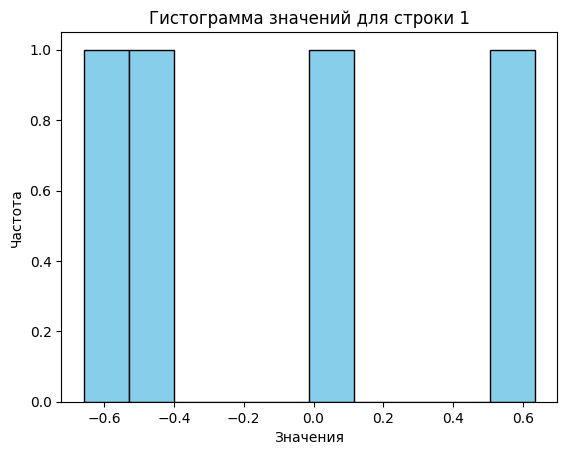

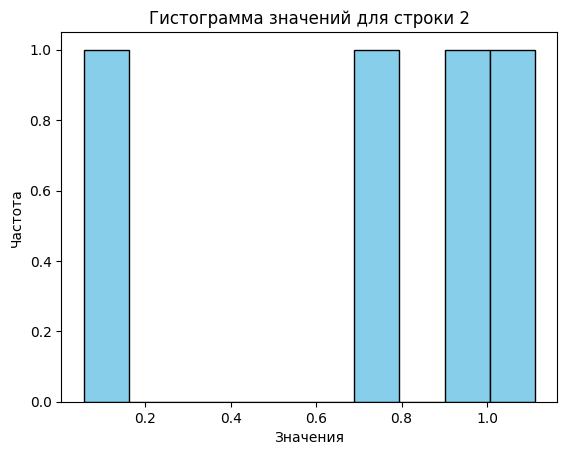

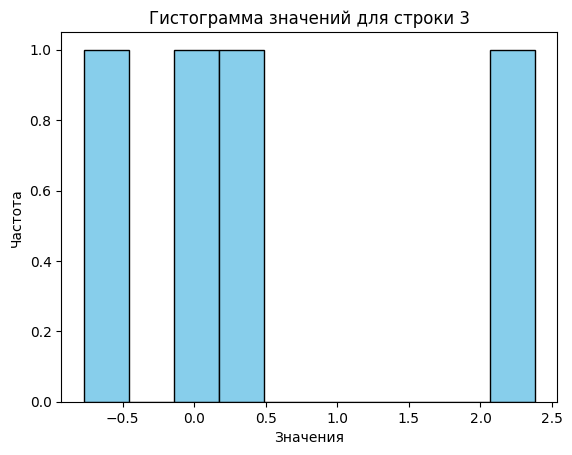

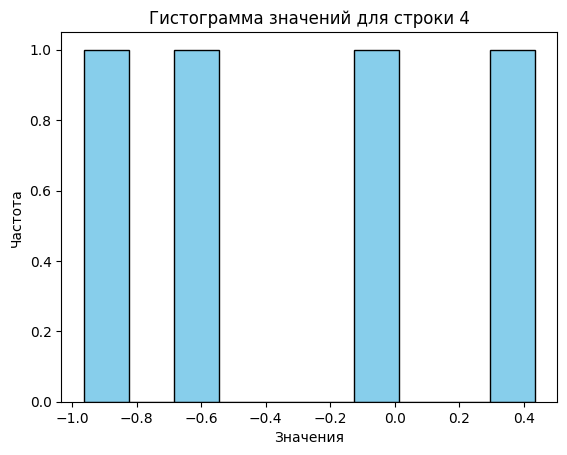

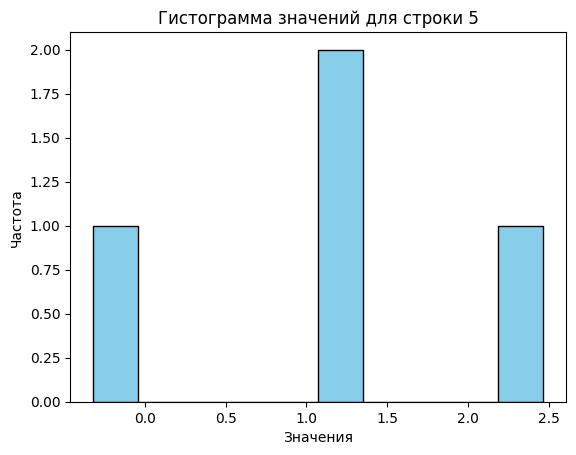

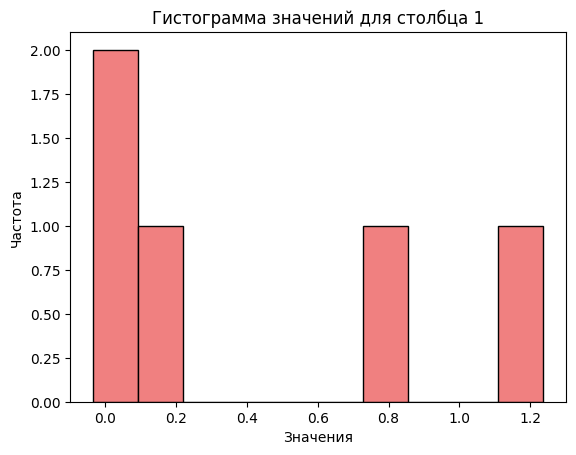

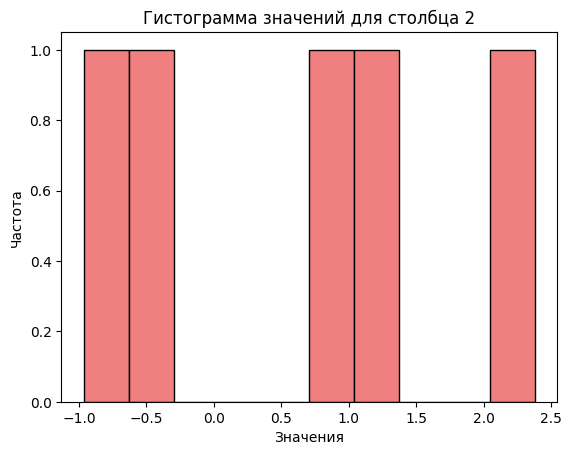

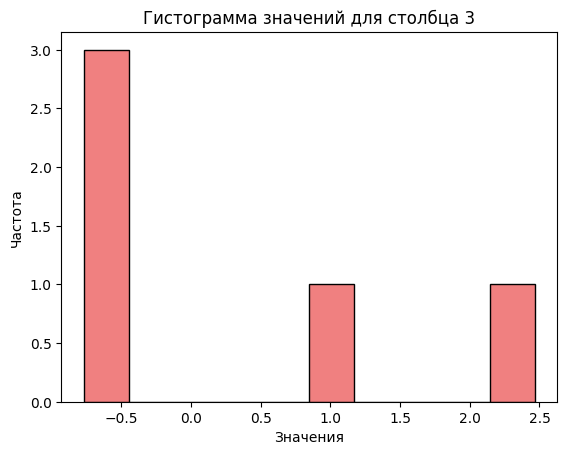

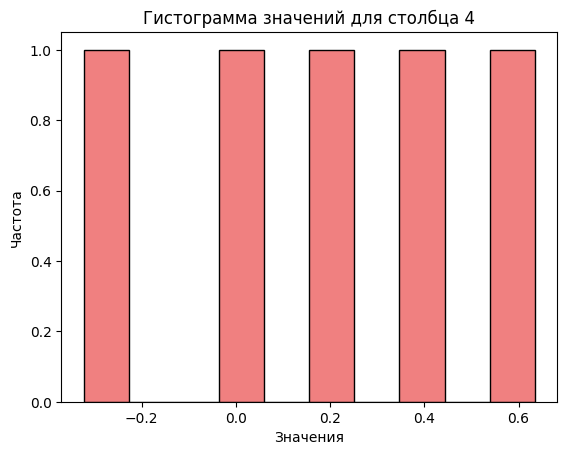

In [20]:
def create_matrix(m, n, mean=0, std=1):
    return np.random.normal(mean, std, size=(m, n))

def calculate_statistics(matrix):
    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)
    col_means = np.mean(matrix, axis=0)
    col_vars = np.var(matrix, axis=0)
    row_stats = {"mean": row_means, "variance": row_vars}
    col_stats = {"mean": col_means, "variance": col_vars}
    
    return row_stats, col_stats

def plot_histograms(matrix):
    num_rows, num_cols = matrix.shape

    for i in range(num_rows):
        plt.hist(matrix[i, :], bins=10, color='skyblue', edgecolor='black')
        plt.title(f'Гистограмма значений для строки {i+1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.show()

    for j in range(num_cols):
        plt.hist(matrix[:, j], bins=10, color='lightcoral', edgecolor='black')
        plt.title(f'Гистограмма значений для столбца {j+1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.show()

# Матрицы размера 5x4
matrix = create_matrix(5, 4)

# Вывод матрицы
print("Сгенерированная матрица:")
print(matrix)

row_stats, col_stats = calculate_statistics(matrix)

print("\nСтатистика по строкам (мат. ожидание и дисперсия):")
for i, (mean, var) in enumerate(zip(row_stats['mean'], row_stats['variance']), 1):
    print(f"Строка {i}: Среднее = {mean:.2f}, Дисперсия = {var:.2f}")

print("\nСтатистика по столбцам (мат. ожидание и дисперсия):")
for j, (mean, var) in enumerate(zip(col_stats['mean'], col_stats['variance']), 1):
    print(f"Столбец {j}: Среднее = {mean:.2f}, Дисперсия = {var:.2f}")

plot_histograms(matrix)


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [21]:
def chess(m, n, a, b):
    matrix = np.zeros((m, n), dtype=type(a))  
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
    return matrix

# тесты
print("Тест 1: Матрица 4x4, a = 1, b = 0")
print(chess(4, 4, 1, 0))

print("\nТест 2: Матрица 3x5, a = 'A', b = 'B'")
print(chess(3, 5, 'A', 'B'))  

print("\nТест 3: Матрица 2x3, a = 5.5, b = -3.2")
print(chess(2, 3, 5.5, -3.2))  

print("\nТест 4: Матрица 1x1, a = 9, b = 2")
print(chess(1, 1, 9, 2))  


Тест 1: Матрица 4x4, a = 1, b = 0
[[1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]]

Тест 2: Матрица 3x5, a = 'A', b = 'B'
[['A' 'B' 'A' 'B' 'A']
 ['B' 'A' 'B' 'A' 'B']
 ['A' 'B' 'A' 'B' 'A']]

Тест 3: Матрица 2x3, a = 5.5, b = -3.2
[[ 5.5 -3.2  5.5]
 [-3.2  5.5 -3.2]]

Тест 4: Матрица 1x1, a = 9, b = 2
[[9]]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [23]:
from PIL import Image, ImageDraw

def draw_rectangle(a, b, m, n, rectangle_color, background_color):

    img = Image.new("RGB", (m, n), background_color)
    draw = ImageDraw.Draw(img)
    top_left = ((m - a) // 2, (n - b) // 2)
    bottom_right = ((m + a) // 2, (n + b) // 2)
    draw.rectangle([top_left, bottom_right], fill=rectangle_color)
    return img

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    img = Image.new("RGB", (m, n), background_color)
    draw = ImageDraw.Draw(img)

    top_left = ((m - 2 * a) // 2, (n - 2 * b) // 2)
    bottom_right = ((m + 2 * a) // 2, (n + 2 * b) // 2)

    draw.ellipse([top_left, bottom_right], fill=ellipse_color)

    return img

# Прямоугольник: размеры 100x50, изображение 300x200, прямоугольник — синий, фон — белый
rect_img = draw_rectangle(100, 50, 300, 200, rectangle_color=(0, 0, 255), background_color=(255, 255, 255))
rect_img.show()

# Овал: полуоси 70 и 40, изображение 300x200, овал — красный, фон — желтый
ellipse_img = draw_ellipse(70, 40, 300, 200, ellipse_color=(255, 0, 0), background_color=(255, 255, 0))
ellipse_img.show()


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [24]:
def calculate_statistics(time_series):
    mean = np.mean(time_series)
    variance = np.var(time_series)
    std_dev = np.sqrt(variance)
    
    return mean, variance, std_dev

def find_local_extremes(time_series):
    local_maxima = []
    local_minima = []

    for i in range(1, len(time_series) - 1):
        if time_series[i] > time_series[i - 1] and time_series[i] > time_series[i + 1]:
            local_maxima.append(i)
        if time_series[i] < time_series[i - 1] and time_series[i] < time_series[i + 1]:
            local_minima.append(i)
    
    return local_maxima, local_minima

def moving_average(time_series, window_size):
    return np.convolve(time_series, np.ones(window_size) / window_size, mode='valid')

time_series = [10, 12, 13, 15, 12, 10, 11, 9, 7, 8, 6, 7, 9, 5, 4, 6, 8, 10]

mean, variance, std_dev = calculate_statistics(time_series)
print(f"Математическое ожидание: {mean:.2f}")
print(f"Дисперсия: {variance:.2f}")
print(f"Среднеквадратическое отклонение: {std_dev:.2f}")

local_maxima, local_minima = find_local_extremes(time_series)
print(f"Индексы локальных максимумов: {local_maxima}")
print(f"Значения локальных максимумов: {[time_series[i] for i in local_maxima]}")
print(f"Индексы локальных минимумов: {local_minima}")
print(f"Значения локальных минимумов: {[time_series[i] for i in local_minima]}")

window_size = 3
smoothed_series = moving_average(time_series, window_size)
print(f"Скользящее среднее (размер окна = {window_size}): {smoothed_series}")


Математическое ожидание: 9.00
Дисперсия: 8.11
Среднеквадратическое отклонение: 2.85
Индексы локальных максимумов: [3, 6, 9, 12]
Значения локальных максимумов: [15, 11, 8, 9]
Индексы локальных минимумов: [5, 8, 10, 14]
Значения локальных минимумов: [10, 7, 6, 4]
Скользящее среднее (размер окна = 3): [11.66666667 13.33333333 13.33333333 12.33333333 11.         10.
  9.          8.          7.          7.          7.33333333  7.
  6.          5.          6.          8.        ]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [48]:
def one_hot_encode(class_vector):
    num_classes = np.max(class_vector) + 1

    one_hot_matrix = np.zeros((len(class_vector), num_classes), dtype=int)

    for idx, label in enumerate(class_vector):
        one_hot_matrix[idx, label] = 1
    
    return one_hot_matrix

# тесты
class_vector_1 = [0, 2, 3, 0]
print("Входной вектор:", class_vector_1)
print("One-hot encoding:\n", one_hot_encode(class_vector_1))
"""
[[1, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0]]
"""
class_vector_2 = [1, 0, 2, 2, 1, 3]
print("\nВходной вектор:", class_vector_2)
print("One-hot encoding:\n", one_hot_encode(class_vector_2))
"""
[[0, 1, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [0, 0, 0, 1]]
"""
class_vector_3 = [3, 3, 3, 0, 1, 2]
print("\nВходной вектор:", class_vector_3)
print("One-hot encoding:\n", one_hot_encode(class_vector_3))

#[[0, 0, 0, 1],
# [0, 0, 0, 1],
# [0, 0, 0, 1],
# [1, 0, 0, 0],
# [0, 1, 0, 0],
# [0, 0, 1, 0]]

Входной вектор: [0, 2, 3, 0]
One-hot encoding:
 [[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]

Входной вектор: [1, 0, 2, 2, 1, 3]
One-hot encoding:
 [[0 1 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]]

Входной вектор: [3, 3, 3, 0, 1, 2]
One-hot encoding:
 [[0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]]
